In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [90]:
df=pd.read_csv('train.csv')
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [91]:
df.shape

(17996, 17)

In [92]:
df.isna().sum()/len(df)*100

Artist Name            0.000000
Track Name             0.000000
Popularity             2.378306
danceability           0.000000
energy                 0.000000
key                   11.191376
loudness               0.000000
mode                   0.000000
speechiness            0.000000
acousticness           0.000000
instrumentalness      24.322072
liveness               0.000000
valence                0.000000
tempo                  0.000000
duration_in min/ms     0.000000
time_signature         0.000000
Class                  0.000000
dtype: float64

In [93]:
df.skew()

Popularity            0.075705
danceability         -0.083522
energy               -0.661169
key                  -0.054995
loudness             -1.761383
mode                 -0.568742
speechiness           3.088002
acousticness          1.105497
instrumentalness      1.530985
liveness              2.176072
valence               0.089928
tempo                 0.379619
duration_in min/ms    0.846930
time_signature       -4.182715
Class                -0.666686
dtype: float64

In [94]:
from sklearn.impute import KNNImputer

In [95]:
imputer=KNNImputer()
Kn=imputer.fit_transform(df.iloc[:,2:])

In [96]:
imputed=pd.DataFrame(Kn,columns=df.iloc[:,2:].columns)
df1=pd.concat([df.iloc[:,0:2],imputed],axis=1)
df1.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1.0,0.0485,0.017100,0.006700,0.0849,0.8990,134.071,234596.0,4.0,5.0
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1.0,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4.0,10.0
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1.0,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4.0,6.0
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0.0,0.0555,0.021200,0.180894,0.1220,0.5690,107.033,173968.0,4.0,5.0
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1.0,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4.0,10.0


In [97]:
df1.isna().sum()

Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

In [98]:
df1['Artist Name'].nunique()

9149

In [99]:
df1['Track Name'].nunique()

15129

In [100]:
df1['Track Name'].duplicated().sum()

2867

In [101]:
df1=df1.drop_duplicates(subset=['Track Name'])

In [102]:
df1=df1.reset_index(drop=True)

In [103]:
df1['duration']=df1['duration_in min/ms']/60000

In [104]:
df1=df1.drop('duration_in min/ms',axis=1)

In [105]:
df1['time_signature'].value_counts()

4.0    13750
3.0     1097
5.0      182
1.0      100
Name: time_signature, dtype: int64

In [106]:
df1['Class'].unique()

array([ 5., 10.,  6.,  2.,  4.,  8.,  9.,  3.,  7.,  1.,  0.])

In [107]:
from sklearn.preprocessing import LabelEncoder

In [108]:
le=LabelEncoder()
df1['Class']=le.fit_transform(df1['Class'])

In [109]:
df1['Class'].value_counts()

10    4074
9     2161
6     1998
8     1634
5     1348
2     1148
1      893
0      563
7      545
3      401
4      364
Name: Class, dtype: int64

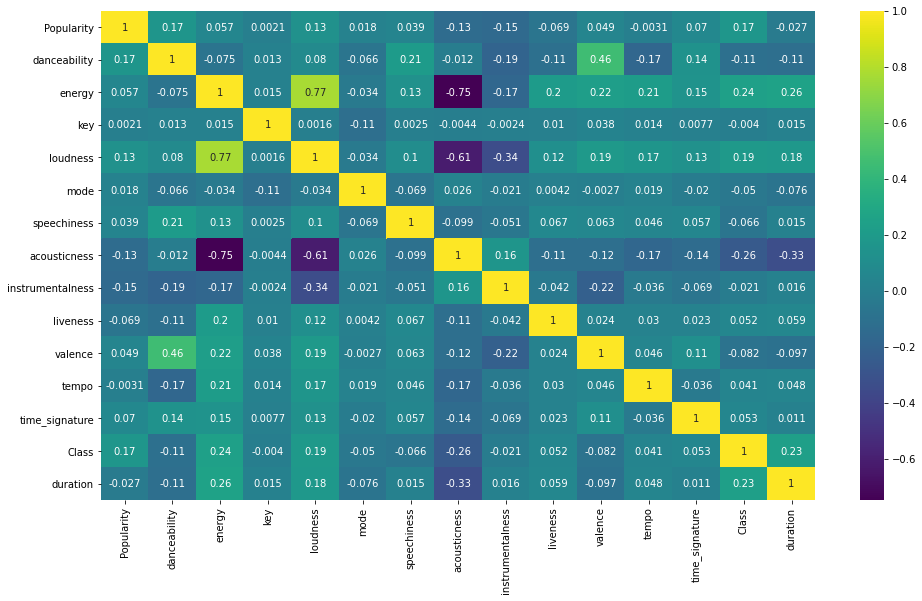

In [110]:
plt.figure(figsize=(16,9))
sns.heatmap(df1.corr(),annot=True,cmap='viridis')
plt.show()

In [111]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import statsmodels.api as sm

In [112]:
art=df1['Artist Name'].value_counts()
art

Backstreet Boys      64
Westlife             50
Britney Spears       49
Eyal Golan           47
Omer Adam            46
                     ..
Spang Sisters         1
Yoshinori Hayashi     1
Vorsa                 1
Dylan Scott           1
Shai Tsabari          1
Name: Artist Name, Length: 8747, dtype: int64

In [113]:
df1['Artist Name']=df1['Artist Name'].map(art)

In [114]:
num_cols=df1.drop(['Artist Name','Track Name','Class','time_signature'],axis=1)

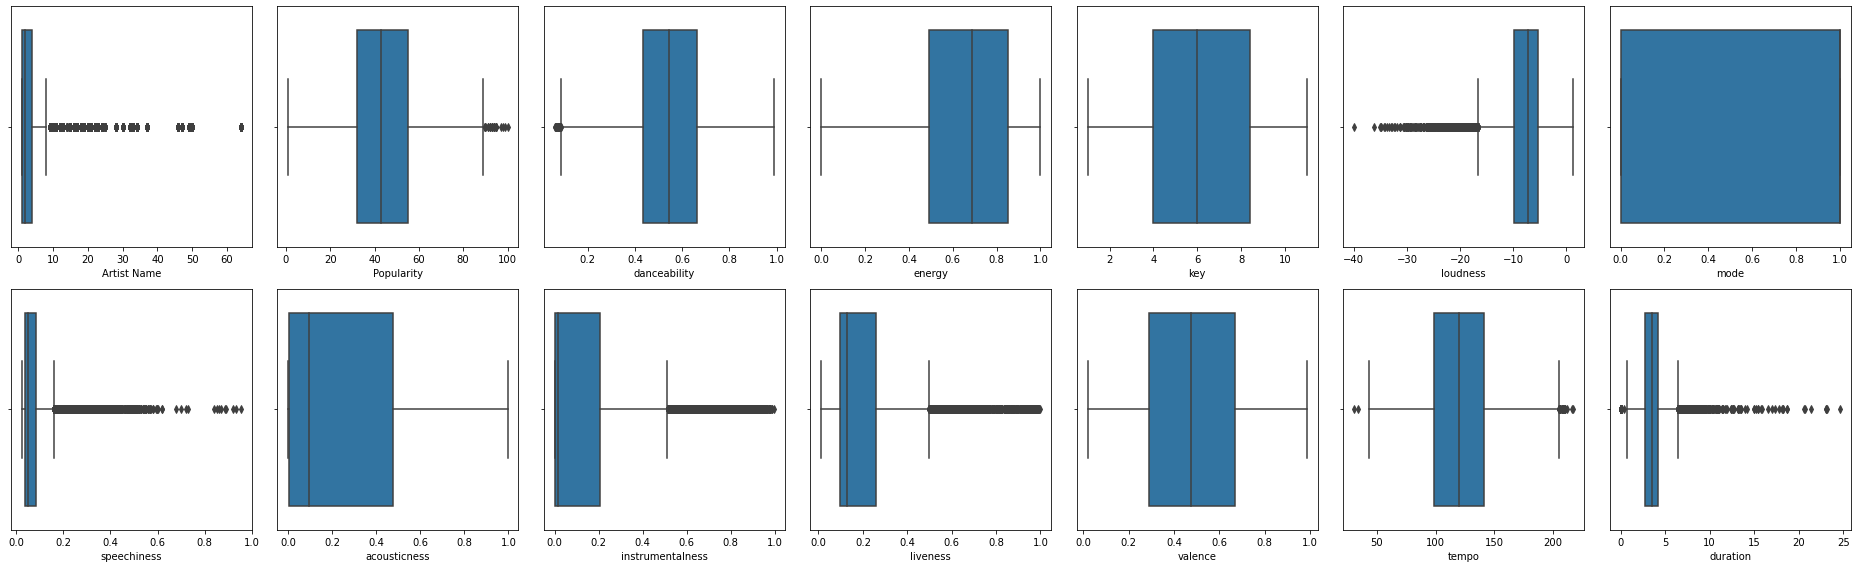

In [115]:
fig,ax=plt.subplots(nrows=2,ncols=7,figsize=(26,8))
for var,sub in zip(num_cols.columns,ax.flatten()):
    sns.boxplot(df1[var],ax=sub)
plt.tight_layout()
plt.show()

In [116]:
df1.columns

Index(['Artist Name', 'Track Name', 'Popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'Class', 'duration'],
      dtype='object')

In [117]:
out_cols=['Popularity','danceability','loudness','speechiness','instrumentalness','liveness','tempo','duration']

In [118]:
def outlier(d,i):
    q1=d[i].quantile(0.25)
    q3=d[i].quantile(0.75)
    iqr=q3-q1
    ub=q3+iqr*1.5
    lb=q1-iqr*1.5
    uv=d[i].quantile(0.99)
    lv=d[i].quantile(0.01)
    for j in range(len(d[i])):
        if d[i][j]>ub:
            d[i][j]=uv
        if d[i][j]<lb:
            d[i][j]=lv

In [119]:
for i in out_cols:
    outlier(df1,i)

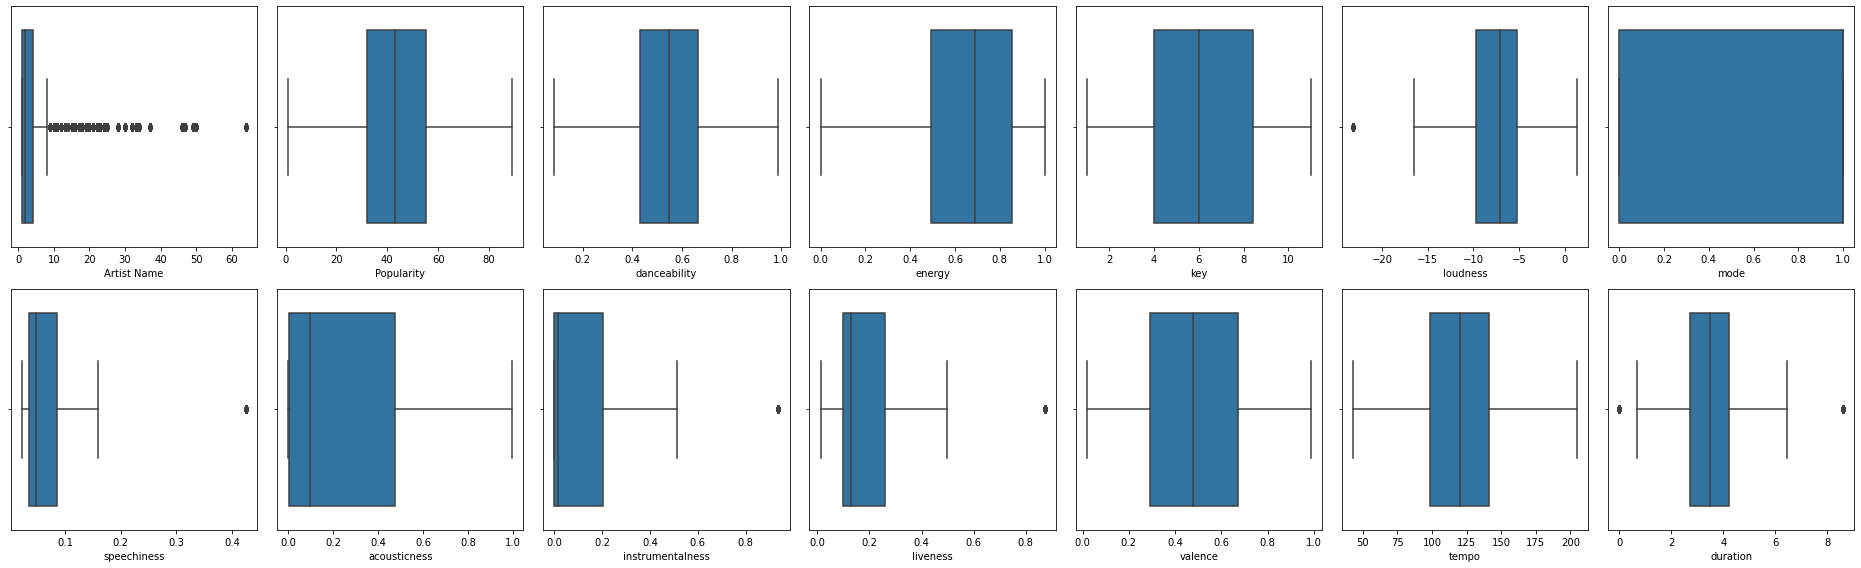

In [129]:
fig,ax=plt.subplots(nrows=2,ncols=7,figsize=(26,8))
for var,sub in zip(num_cols.columns,ax.flatten()):
    sns.boxplot(df1[var],ax=sub)
plt.tight_layout()
plt.show()

In [130]:
x=df1.drop(['Class','Track Name'],axis=1)
y=df1['Class']

In [160]:
x.head()

,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
0,4,60.0,0.854,0.564,1.0,-4.964,1.0,0.0485,0.017100,0.006700,0.0849,0.8990,134.071,4.0,3.909933
1,4,54.0,0.382,0.814,3.0,-7.230,1.0,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,4.0,4.195550
2,2,35.0,0.434,0.614,6.0,-8.334,1.0,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,4.0,1.827783
3,3,66.0,0.853,0.597,10.0,-6.528,0.0,0.0555,0.021200,0.180894,0.1220,0.5690,107.033,4.0,2.899467
4,15,53.0,0.167,0.975,2.0,-4.279,1.0,0.4250,0.000169,0.016100,0.1720,0.0918,199.060,4.0,3.832667


In [161]:
ss=StandardScaler()
x_scaled=pd.DataFrame(ss.fit_transform(x),columns=x.columns)

In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [164]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()
clf3=RandomForestClassifier()
clf4=KNeighborsClassifier()
clf5=GaussianNB()
clf6=GradientBoostingClassifier()
clf7=XGBClassifier()

## models with unscaled data

In [165]:
from sklearn.model_selection import cross_val_score
mod=[clf1,clf2,clf3,clf4,clf5,clf6,clf7]
mod_name=['LogR','DT','RF','KNN','GaussNB','GradBoost','XGB']
for  i ,j in zip(mod,mod_name):
    score=cross_val_score(i,x,y,cv=5)
    avg_score=np.mean(score)
    var_score=np.std(score)/np.mean(score)*100
    print(j,'Avg Score:',avg_score, ' Variance error: ',var_score)

LogR Avg Score: 0.35541107645584  Variance error:  2.5977847099886433
DT Avg Score: 0.44880877027196797  Variance error:  3.5162547454314192
RF Avg Score: 0.581598815772943  Variance error:  1.68113209852679
KNN Avg Score: 0.3215692100965189  Variance error:  3.2245221483637447
GaussNB Avg Score: 0.4775605359610647  Variance error:  2.1079078391902892
GradBoost Avg Score: 0.5812689364351925  Variance error:  1.9126343807314334
[19:54:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:54:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set ev

## Models with scaled data

In [166]:
from sklearn.model_selection import cross_val_score
mod=[clf1,clf2,clf3,clf4,clf5,clf6,clf7]
mod_name=['LogR','DT','RF','KNN','GaussNB','GradBoost','XGB']
for  i ,j in zip(mod,mod_name):
    score=cross_val_score(i,x_scaled,y,cv=5)
    avg_score=np.mean(score)
    var_score=np.std(score)/np.mean(score)*100
    print(j,'Avg Score:',avg_score, ' Variance error: ',var_score)

LogR Avg Score: 0.5303726710110175  Variance error:  1.763923758553787
DT Avg Score: 0.45098938674736305  Variance error:  2.5622455007696785
RF Avg Score: 0.5837798692324919  Variance error:  1.232207286706125
KNN Avg Score: 0.4852276632818603  Variance error:  1.011319360603748
GaussNB Avg Score: 0.47610636194305006  Variance error:  2.092466997238231
GradBoost Avg Score: 0.579880965516488  Variance error:  2.0592340740106305
[19:58:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:59:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set e

## train test split

In [167]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,stratify=y,random_state=30)

## XGBoost

In [168]:
xg_model=clf7.fit(x_train,y_train)

[20:00:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [169]:
xg_model.score(x_test,y_test)

0.5822868473231989

In [170]:
xg_pred=xg_model.predict_proba(x_test)

In [171]:
from sklearn.metrics import log_loss

In [172]:
log_loss(y_test,xg_pred)

1.1363540575261968

**tuning XGBoost**

In [173]:
xg=XGBClassifier(max_depth= 5,n_estimators=50,objective= 'multi:softmax')

In [174]:
xgt=xg.fit(x_train,y_train)

[20:00:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [175]:
xgt_pred=xgt.predict_proba(x_test)

In [176]:
log_loss(y_test,xgt_pred)

1.1007538972397526

## Random Forest

In [177]:
rf_model=clf3.fit(x_train,y_train)

In [178]:
rf_model.score(x_test,y_test)

0.5803040317250495

In [179]:
rf_pred=rf_model.predict_proba(x_test)

In [180]:
log_loss(y_test,rf_pred)

1.240772165928162

**Tuning Random Forest**

In [181]:
from sklearn.model_selection import GridSearchCV

In [182]:
rf=RandomForestClassifier(max_depth=20,n_estimators=200)

In [183]:
rf_tuned=rf.fit(x_train,y_train)
rft_pred=rf_tuned.predict_proba(x_test)

In [184]:
log_loss(y_test,rft_pred)

1.167798377604263

## voting classifier

In [185]:
from sklearn.ensemble import VotingClassifier
estimator=[('RF',RandomForestClassifier()),('logreg',LogisticRegression()),('GradBoost',GradientBoostingClassifier()),
          ('XGB',XGBClassifier())]

In [186]:
vot1=VotingClassifier(estimators=estimator,voting='hard')
vot2=VotingClassifier(estimators=estimator,voting='soft')

In [187]:
hard_vot=vot1.fit(x_train,y_train)

[20:00:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [188]:
soft_vot=vot2.fit(x_train,y_train)

[20:01:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [189]:
soft_pred=soft_vot.predict_proba(x_test)
log_loss(y_test,soft_pred)

1.1075194069931897

## Stacking classifier

In [190]:
from sklearn.ensemble import StackingClassifier
estimator=[('RF',RandomForestClassifier()),('logreg',LogisticRegression()),('GradBoost',GradientBoostingClassifier()),
          ('XGB',XGBClassifier())]

In [191]:
sc=StackingClassifier(estimators=estimator,final_estimator=RandomForestClassifier())

In [192]:
stack_model=sc.fit(x_train,y_train)

[20:02:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:04:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:04:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:04:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [193]:
stack_pred=stack_model.predict_proba(x_test)
log_loss(y_test,stack_pred)

1.2428955167800149

## Test data

In [194]:
df_test=pd.read_csv('test.csv')
df_test.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,David Bowie,Space Oddity - 2015 Remaster,73.0,0.310,0.403,NaN,-13.664,1,0.0326,0.07260,0.000093,0.1390,0.466,134.480,318027.000000,4
1,Crimson Sun,Essence of Creation,34.0,0.511,0.955,1.0,-5.059,1,0.1290,0.00040,0.000009,0.2630,0.291,151.937,220413.000000,4
2,P!nk,Raise Your Glass,78.0,0.700,0.709,7.0,-5.006,1,0.0839,0.00480,NaN,0.0289,0.625,122.019,202960.000000,4
3,Shawn Mendes,Wonder,80.0,0.333,0.637,1.0,-4.904,0,0.0581,0.13100,0.000018,0.1490,0.132,139.898,172693.000000,4
4,Backstreet Boys,Helpless When She Smiles - Radio Version,48.0,0.393,0.849,11.0,-4.114,1,0.0459,0.00421,NaN,0.1620,0.222,74.028,4.093117,4


In [195]:
df_test.shape

(7713, 16)

In [196]:
df['Artist Name'].value_counts()

Backstreet Boys       69
Westlife              60
Britney Spears        54
Eyal Golan            48
Omer Adam             48
                      ..
AJ Ghent [ j-ent ]     1
Tan Cologne            1
Ka$tro                 1
Tohar                  1
Ishman Bracey          1
Name: Artist Name, Length: 9149, dtype: int64

In [197]:
df_test['Artist Name'].value_counts()

Westlife              37
Britney Spears        37
Backstreet Boys       29
The Rolling Stones    20
Shlomo Artzi          18
                      ..
Juan Wauters           1
LULLANAS               1
Papooz                 1
Only The Family        1
Shai Tsabari           1
Name: Artist Name, Length: 5010, dtype: int64

In [198]:
df_test.isna().sum()

Artist Name              0
Track Name               0
Popularity             227
danceability             0
energy                   0
key                    808
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      1909
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
dtype: int64

In [199]:
test_kn=imputer.fit_transform(df_test.iloc[:,2:])

In [200]:
test_imp=pd.DataFrame(test_kn,columns=df_test.iloc[:,2:].columns)
df2=pd.concat([df_test.iloc[:,0:2],test_imp],axis=1)
df2.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,David Bowie,Space Oddity - 2015 Remaster,73.0,0.310,0.403,2.4,-13.664,1.0,0.0326,0.07260,0.000093,0.1390,0.466,134.480,318027.000000,4.0
1,Crimson Sun,Essence of Creation,34.0,0.511,0.955,1.0,-5.059,1.0,0.1290,0.00040,0.000009,0.2630,0.291,151.937,220413.000000,4.0
2,P!nk,Raise Your Glass,78.0,0.700,0.709,7.0,-5.006,1.0,0.0839,0.00480,0.191673,0.0289,0.625,122.019,202960.000000,4.0
3,Shawn Mendes,Wonder,80.0,0.333,0.637,1.0,-4.904,0.0,0.0581,0.13100,0.000018,0.1490,0.132,139.898,172693.000000,4.0
4,Backstreet Boys,Helpless When She Smiles - Radio Version,48.0,0.393,0.849,11.0,-4.114,1.0,0.0459,0.00421,0.407207,0.1620,0.222,74.028,4.093117,4.0


In [201]:
df2['Artist Name']=df2['Artist Name'].map(art)

In [202]:
df2['duration']=df2['duration_in min/ms']/60000

In [203]:
df2=df2.drop('duration_in min/ms',axis=1)

In [204]:
df2=df2.drop('Track Name',axis=1)

In [205]:
df2.isna().sum()

Artist Name         2512
Popularity             0
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
time_signature         0
duration               0
dtype: int64

In [206]:
df2=pd.DataFrame(imputer.fit_transform(df2),columns=df2.columns)

In [207]:
ss=StandardScaler()
t_scaled=pd.DataFrame(ss.fit_transform(df2),columns=df2.columns)

In [208]:
t_scaled.head()

,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
0,0.722132,1.628966,-1.444010,-1.109274,-1.139246,-1.462314,0.739758,-0.563408,-0.548077,-0.600790,-0.367629,-0.099952,0.387036,0.221636,1.048626
1,-0.089083,-0.637273,-0.225055,1.241592,-1.590520,0.698604,0.739758,0.581173,-0.782504,-0.601105,0.400703,-0.835305,0.974386,0.221636,0.185570
2,-0.351535,1.919509,0.921127,0.193923,0.343510,0.711913,0.739758,0.045689,-0.768217,0.117285,-1.049834,0.568168,-0.032221,0.221636,0.031259
3,-0.590128,2.035727,-1.304528,-0.112711,-1.590520,0.737528,-1.351794,-0.260640,-0.358458,-0.601070,-0.305667,-1.503425,0.569328,0.221636,-0.236347
4,6.925547,0.176249,-0.940660,0.790157,1.632863,0.935915,0.739758,-0.405494,-0.770133,0.925142,-0.225116,-1.125244,-1.646904,0.221636,-1.763181


In [216]:
test_model=xg.fit(x_scaled,y)

[20:09:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [217]:
test_pred=test_model.predict_proba(t_scaled)

In [218]:
sub=pd.DataFrame(test_pred)

In [221]:
sub.to_csv('xgtuned.csv', index=False)